## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x_points = np.linspace(0,20)
print(x_points)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


In [3]:
y_points= x_points *-2 + 1 
print(y_points)

[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.67346939
 -23.48979592 -24.30612245 -25.12244898 -25.93877551 -26.75510204
 -27.57142857 -28.3877551  -29.20408163 -30.02040816 -30.83673469
 -31.65306122 -32.46938776 -33.28571429 -34.10204082 -34.91836735
 -35.73469388 -36.55102041 -37.36734694 -38.18367347 -39.        ]


#### Plot your data points. 

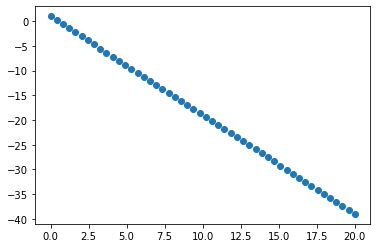

In [4]:
plt.scatter(x_points,y_points)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

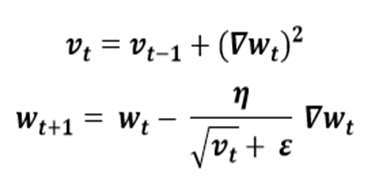

In [5]:
def GD_adgard(x_points,y_points,lr,epsilon ,epoch ):
    loss=[]
    tt0=[]
    tt1=[]
    hhx =[]
    gd_threshold = 0.01
    co_threshold = 0.001
    th_thresold = 0.001
    m = len(x_points)
    th0 = th1 = 0 #init theata
    vt0 = vt1 = 0
   
    for i in range (epoch):
        hx = th0 +th1 * x_points

        cost = np.power(np.linalg.norm(hx-y_points),2)/(2*m)
        #print(cost)

        deltaTh0 = np.sum(hx-y_points)/m
        deltaTh1 = np.sum((hx-y_points)* x_points)/m
        
        vt0 = vt0 + (deltaTh0**2)
        vt1 = vt1 + (deltaTh1**2)
        
        
        th0 -= (lr *deltaTh0)/np.sqrt(vt0+epsilon)
        th1 -= (lr *deltaTh1)/np.sqrt(vt1+epsilon)
        
        gradiant = np.linalg.norm(np.array([deltaTh0,deltaTh1]))
        #print(gradiant)
        if i> 0:
            if gradiant < gd_threshold :
                break
            
            if np.absolute(cost - loss[i-1]) <co_threshold :
                break

            if np.absolute(th0-tt0[i-1]) <th_thresold and np.absolute(th1-tt1[i-1]) <th_thresold :
                break

        loss.append(cost)
        tt0.append(th0)
        tt1.append(th1)
        hhx.append(hx)
    loss.append(cost)
    tt0.append(th0)
    tt1.append(th1)
    hhx.append(hx)
    return loss,tt0,tt1,hhx,th0,th1

In [6]:
lr = 0.5
epoch = 50000
epsilon = 0.00001
v,tt0,tt1,hhx,th0,th1 =GD_adgard(x_points,y_points,lr,epsilon ,epoch )
gd = r2_score(y_points, hhx[-1])
print(gd)

#notes
#whene activate last stop criteria it stop around iteration 4000  and give accurecy 0.4498059347529514 
#whene activate first stop criteria no stop and give accurecy 0.9886023606624267 
#whene activate middle stop criteria it stop around iteration 20000  giving accurecy 0.9810963029531856
print(th0,th1)

0.9982527524094663
0.03458980204038137 -1.926531532176695


Text(0.5, 0, 'epoch')

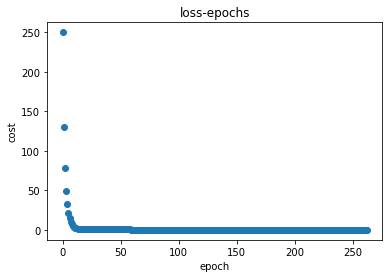

In [7]:
x_axis = [x for  x in range(len(v))]
plt.scatter(x_axis,v)
plt.title("loss-epochs")
plt.ylabel("cost")
plt.xlabel("epoch")

Text(0.5, 0, 'theta')

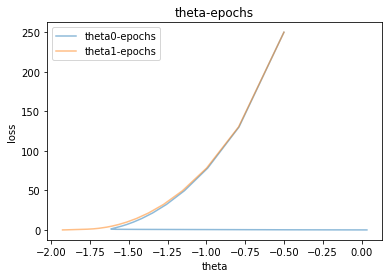

In [8]:
plt.plot(tt0,v,alpha = 0.5)
plt.plot(tt1,v , alpha = 0.5)
plt.legend(["theta0-epochs","theta1-epochs"])
plt.title("theta-epochs")
plt.ylabel("loss")
plt.xlabel("theta")

Text(0.5, 0, 'xPoints')

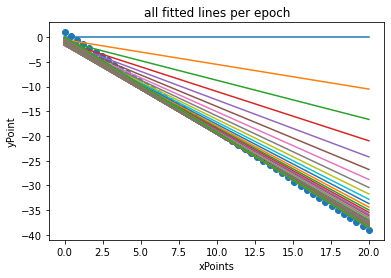

In [9]:
plt.scatter(x_points,y_points)
for l in hhx :
    plt.plot(x_points,l)
plt.title("all fitted lines per epoch")
plt.ylabel("yPoint")
plt.xlabel("xPoints")

Text(0.5, 0, 'xPoints')

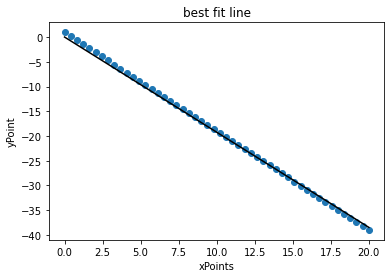

In [10]:
plt.scatter(x_points,y_points)
plt.plot(x_points,hhx[-1] ,  color='black')
plt.title("best fit line")
plt.ylabel("yPoint")
plt.xlabel("xPoints")

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

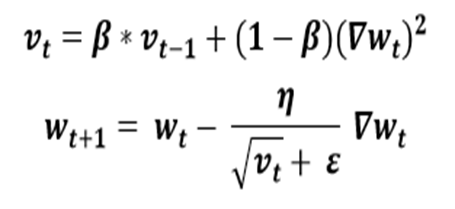

In [11]:
def GD_RMS(x_points,y_points,lr,epsilon ,beta,epoch ):
    loss=[]
    tt0=[]
    tt1=[]
    hhx =[]
    gd_threshold = 0.001
    co_threshold = 0.0001
    th_thresold = 0.0001
    m = len(x_points)
    th0 = th1 = 0 #init theata
    vt0 = vt1 = 0
   
    for i in range (epoch):
        hx = th0 +th1 * x_points

        cost = np.power(np.linalg.norm(hx-y_points),2)/(2*m)
        #print(cost)

        deltaTh0 = np.sum(hx-y_points)/m
        deltaTh1 = np.sum((hx-y_points)* x_points)/m
        
        vt0 = beta * vt0 + (1-beta) * (deltaTh0**2)
        vt1 = beta * vt1 + (1-beta) * (deltaTh1**2)
        
        
        th0 -= (lr *deltaTh0)/np.sqrt(vt0+epsilon)
        th1 -= (lr *deltaTh1)/np.sqrt(vt1+epsilon)
        
        gradiant = np.linalg.norm(np.array([deltaTh0,deltaTh1]))
        #print(gradiant)
        if i> 0:
            if gradiant < gd_threshold :
                break
            
            if np.absolute(cost - loss[i-1]) <co_threshold :
                break

            if np.absolute(th0-tt0[i-1]) <th_thresold and np.absolute(th1-tt1[i-1]) <th_thresold :
                break

        loss.append(cost)
        tt0.append(th0)
        tt1.append(th1)
        hhx.append(hx)
    loss.append(cost)
    tt0.append(th0)
    tt1.append(th1)
    hhx.append(hx)
    return loss,tt0,tt1,hhx,th0,th1

In [12]:
lr = 0.01
epoch = 50000
epsilon = 0.001
beta = 0.999
v,tt0,tt1,hhx,th0,th1 =GD_RMS(x_points,y_points,lr,epsilon ,beta,epoch )
gd = r2_score(y_points, hhx[-1])
print(gd)

#notes
#whene activate last stop criteria it stop around iteration 1600  and give accurecy 0.9999989990019962 
#whene activate first stop criteria it stop around iteration 2000 and give accurecy 0.9999999843872778 
#whene activate middle stop criteria it stop around iteration 800  giving accurecy 0.9997569370800115

0.9997569370800115


Text(0.5, 0, 'epoch')

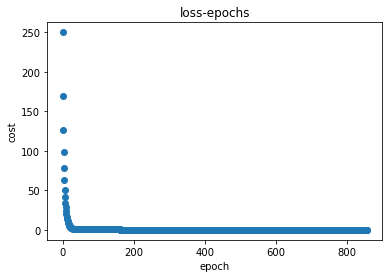

In [13]:
x_axis = [x for  x in range(len(v))]
plt.scatter(x_axis,v)
plt.title("loss-epochs")
plt.ylabel("cost")
plt.xlabel("epoch")

Text(0.5, 0, 'theta')

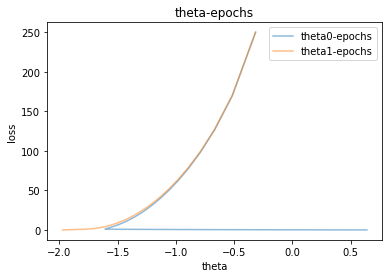

In [14]:
plt.plot(tt0,v,alpha = 0.5)
plt.plot(tt1,v , alpha = 0.5)
plt.legend(["theta0-epochs","theta1-epochs"])
plt.title("theta-epochs")
plt.ylabel("loss")
plt.xlabel("theta")

Text(0.5, 0, 'xPoints')

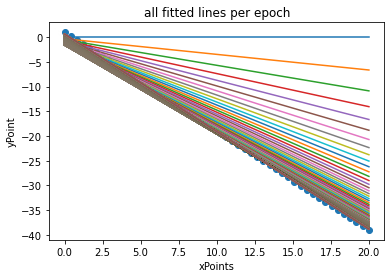

In [15]:
plt.scatter(x_points,y_points)
for l in hhx :
    plt.plot(x_points,l)
plt.title("all fitted lines per epoch")
plt.ylabel("yPoint")
plt.xlabel("xPoints")

Text(0.5, 0, 'xPoints')

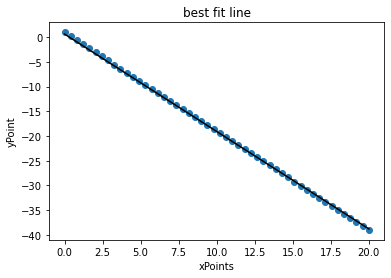

In [16]:
plt.scatter(x_points,y_points)
plt.plot(x_points,hhx[-1] ,  color='black')
plt.title("best fit line")
plt.ylabel("yPoint")
plt.xlabel("xPoints")

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

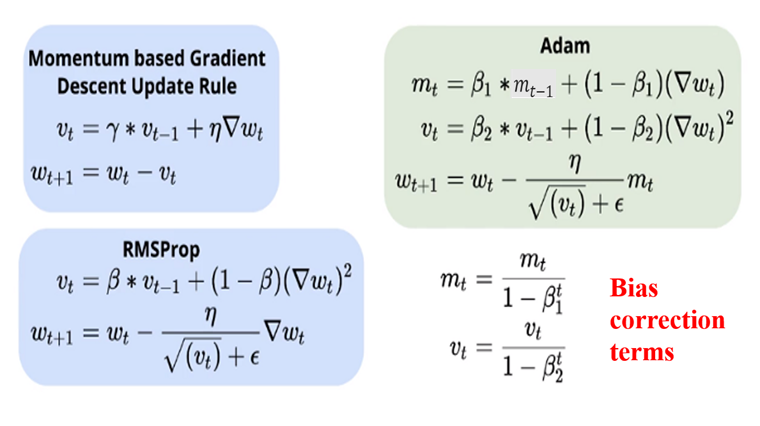

In [23]:
def GD_Adam(x_points,y_points,lr,epsilon ,beta1,beta2,epoch ):
    loss=[]
    tt0=[]
    tt1=[]
    hhx =[]
    gd_threshold = 0.01
    co_threshold = 0.0001
    th_thresold = 0.0001
    m = len(x_points)
    th0 = th1 = 0 #init theata
    vt0 = vt1 = 0
    mt0 = mt1 = 0
   
    for i in range (epoch):
        hx = th0 +th1 * x_points

        cost = np.power(np.linalg.norm(hx-y_points),2)/(2*m)
        #print(cost)

        deltaTh0 = np.sum(hx-y_points)/m
        deltaTh1 = np.sum((hx-y_points)* x_points)/m
        
        mt0 = beta1 * mt0 + (1-beta1) * deltaTh0
        mt1 = beta1 * mt1 + (1-beta1) * deltaTh1
        
        vt0 = beta2 * vt0 + (1-beta2) * (deltaTh0**2)
        vt1 = beta2 * vt1 + (1-beta2) * (deltaTh1**2)
        
        
        th0 -= (lr *(mt0/(1-beta1)))/np.sqrt((vt0/(1-beta2))+epsilon)
        th1 -= (lr *(mt1/(1-beta1)))/np.sqrt((vt1/(1-beta2))+epsilon)
        
        gradiant = np.linalg.norm(np.array([deltaTh0,deltaTh1]))
        #print(gradiant)
        if i> 0:
            if gradiant < gd_threshold :
                break
            
            if np.absolute(cost - loss[i-1]) <co_threshold :
                break

            if np.absolute(th0-tt0[i-1]) <th_thresold and np.absolute(th1-tt1[i-1]) <th_thresold :
                break

        loss.append(cost)
        tt0.append(th0)
        tt1.append(th1)
        hhx.append(hx)
    loss.append(cost)
    tt0.append(th0)
    tt1.append(th1)
    hhx.append(hx)
    return loss,tt0,tt1,hhx,th0,th1

In [24]:
lr = 0.01
epoch = 50000
epsilon = 0.001
beta1 = 0.9
beta2 = 0.999
v,tt0,tt1,hhx,th0,th1 =GD_Adam(x_points,y_points,lr,epsilon ,beta1,beta2,epoch )
gd = r2_score(y_points, hhx[-1])
print(gd)

#notes
#whene activate last stop criteria it stop around iteration 2000  and give accurecy 0.9999984998230769
#whene activate first stop criteria it stop around iteration 2500 and give accurecy 0.9999999842986576 
#whene activate middle stop criteria it stop around iteration 1200  giving accurecy 0.9996622663036534

0.999203323466638


Text(0.5, 0, 'epoch')

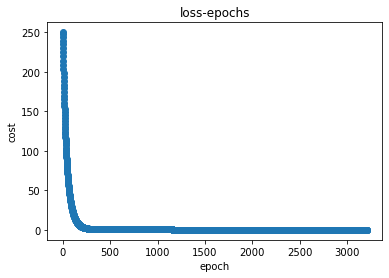

In [25]:
x_axis = [x for  x in range(len(v))]
plt.scatter(x_axis,v)
plt.title("loss-epochs")
plt.ylabel("cost")
plt.xlabel("epoch")

Text(0.5, 0, 'theta')

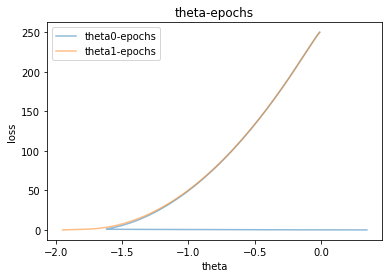

In [26]:
plt.plot(tt0,v,alpha = 0.5)
plt.plot(tt1,v , alpha = 0.5)
plt.legend(["theta0-epochs","theta1-epochs"])
plt.title("theta-epochs")
plt.ylabel("loss")
plt.xlabel("theta")

Text(0.5, 0, 'xPoints')

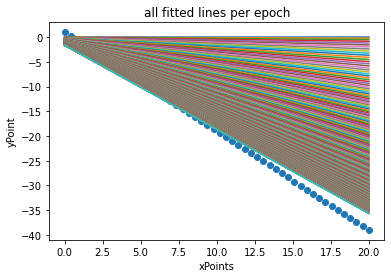

In [21]:
plt.scatter(x_points,y_points)
for l in hhx :
    plt.plot(x_points,l)
plt.title("all fitted lines per epoch")
plt.ylabel("yPoint")
plt.xlabel("xPoints")

Text(0.5, 0, 'xPoints')

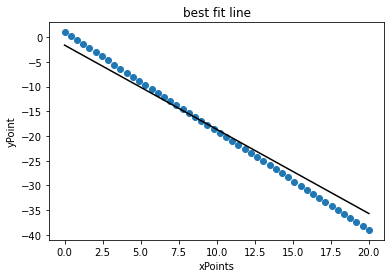

In [22]:
plt.scatter(x_points,y_points)
plt.plot(x_points,hhx[-1] ,  color='black')
plt.title("best fit line")
plt.ylabel("yPoint")
plt.xlabel("xPoints")

## Congratulations 
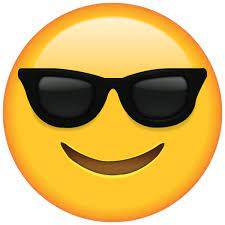